In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv("movies.csv")
print(df.shape)

(9742, 3)


In [3]:
df1 = pd.read_csv("ratings.csv")
print(df1.shape)

(100836, 4)


In [4]:
df1.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [5]:
unique = df1['userId'].unique()

In [6]:
len_of = len(unique)

In [7]:
print(len_of)

610


In [8]:
movie_Id = 589

In [9]:
filtered_off = df1[df1['movieId']==movie_Id]

In [10]:
average_rate = filtered_off['rating'].mean()
print(average_rate)

3.970982142857143


In [11]:
#user_id = 2959
filter_of = df1[df1['userId']== 2959]

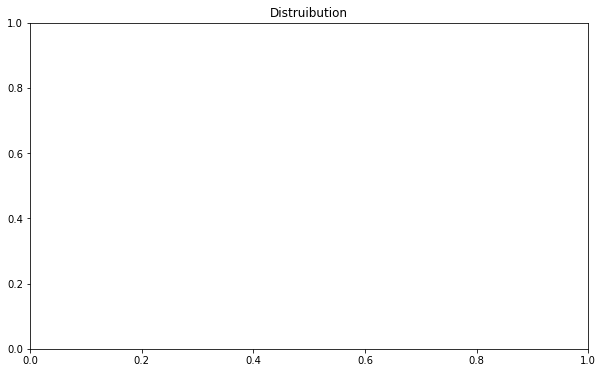

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(filter_of['rating'], kde=True, bins = 10)
plt.title("Distruibution")
plt.show()

In [24]:
groupe = df1.groupby('movieId')['rating'].agg(['count','mean']).reset_index()

In [25]:
fill=groupe[groupe['count'] > 50]

In [15]:
fill.to_csv('fill.csv',index=False)

In [22]:
max_count=fill.loc[fill['count'].idxmax()]
movie=max_count['movieId']
print(movie)

356.0


In [26]:
print(fill)

      movieId  count      mean
0           1    215  3.920930
1           2    110  3.431818
2           3     52  3.259615
5           6    102  3.946078
6           7     54  3.185185
...       ...    ...       ...
8287   106782     54  3.916667
8354   109374     52  3.778846
8358   109487     73  3.993151
8457   112852     59  4.050847
8673   122904     54  3.833333

[436 rows x 3 columns]


In [ ]:
merged = pd.merge(fill,df,on = 'movieId',how = 'inner')

In [ ]:
print(merged.head())

In [19]:
# Step 1: Group by movieid and calculate count and mean of ratings
grouped_ratings_df = df1.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

# Filter movies with more than 50 ratings
filtered_ratings_df = grouped_ratings_df[grouped_ratings_df['count'] > 50]

# Step 2: Merge with movies dataframe
merged_df = pd.merge(filtered_ratings_df, df, on='movieId', how='inner')

# Step 3: Find the movie with the highest average rating
most_popular_movie = merged_df.loc[merged_df['mean'].idxmax()]

print(most_popular_movie)

movieId                                 318
count                                   317
mean                               4.429022
title      Shawshank Redemption, The (1994)
genres                          Crime|Drama
Name: 53, dtype: object


In [20]:
# Step 1: Group by movieid and calculate count of ratings
grouped_ratings_df = df1.groupby('movieId')['rating'].agg(['count']).reset_index()

# Filter movies with more than 50 ratings
filtered_ratings_df = grouped_ratings_df[grouped_ratings_df['count'] > 50]

# Step 2: Merge with movies dataframe
merged_df = pd.merge(filtered_ratings_df,df, on='movieId', how='inner')

# Step 3: Sort by number of ratings and get top 5
top_5_movies = merged_df.sort_values(by='count', ascending=False).head(5)

# Display the top 5 movies
print(top_5_movies)

     movieId  count                             title  \
61       356    329               Forrest Gump (1994)   
53       318    317  Shawshank Redemption, The (1994)   
49       296    307               Pulp Fiction (1994)   
99       593    279  Silence of the Lambs, The (1991)   
248     2571    278                Matrix, The (1999)   

                          genres  
61      Comedy|Drama|Romance|War  
53                   Crime|Drama  
49   Comedy|Crime|Drama|Thriller  
99         Crime|Horror|Thriller  
248       Action|Sci-Fi|Thriller  


In [21]:
# Step 3: Filter Sci-Fi movies
sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi')]

# Step 4: Sort by number of ratings and get the third most popular Sci-Fi movie
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='count', ascending=False)
third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]  # Third entry in the sorted list

# Display the result
title = third_most_popular_sci_fi_movie['title']
print(f"The third most popular Sci-Fi movie based on the number of user ratings is: {title}")

The third most popular Sci-Fi movie based on the number of user ratings is: Jurassic Park (1993)


In [22]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [23]:
movies_df = pd.read_csv('fill.csv')

In [24]:
movies_df.head()

,movieId,count,mean
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,6,102,3.946078
4,7,54,3.185185


In [25]:
movies_df.shape

(436, 3)

In [26]:
links_df = pd.read_csv('links.csv')

In [27]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [28]:
merged = pd.merge(movies_df,links_df, on = 'movieId')

In [ ]:
def scrape_imdb_rating(imdb_id):
    url = f'https://www.imdb.com/title/{imdb_id}/'
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        rating_tag = soup.find('span', itemprop='ratingValue')
        if rating_tag:
            return float(rating_tag.text)
    return None

# Scrape IMDb ratings and add to DataFrame
merged['imdb_rating'] = merged['imdbId'].apply(scrape_imdb_rating)

In [ ]:
# Drop rows where IMDb rating could not be retrieved
valid_ratings_df = merged.dropna(subset=['imdb_rating'])

# Find the movie with the highest IMDb rating
highest_rated_movie = valid_ratings_df.loc[valid_ratings_df['imdb_rating'].idxmax()]

# Get the movieid of the movie with the highest rating
highest_rated_movie_id = highest_rated_movie['movieId']
print(f"The movieid of the movie with the highest IMDb rating is: {highest_rated_movie_id}")

In [ ]:
# Load the datasets
movies_df = pd.read_csv('fill.csv')  # The filtered dataset with >50 ratings
links_df = pd.read_csv('links.csv')

# Merge datasets on movieid to get IMDb IDs
merged_df = pd.merge(movies_df, links_df, on='movieId')

# Function to scrape IMDb rating
def scrape_imdb_rating(imdbId):
    url = f'https://www.imdb.com/title/{imdbId}/'
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        rating_tag = soup.find('span', itemprop='ratingValue')
        if rating_tag:
            return float(rating_tag.text)
    return None

# Scrape IMDb ratings and add to DataFrame
merged_df['imdb_rating'] = merged_df['imdbId'].apply(scrape_imdb_rating)

# Filter for Sci-Fi movies
sci_fi_movies_df = merged_df[merged_df['genre'].str.contains('Sci-Fi')]

# Drop rows where IMDb rating could not be retrieved
valid_ratings_df = sci_fi_movies_df.dropna(subset=['imdb_rating'])

# Find the Sci-Fi movie with the highest IMDb rating
highest_rated_sci_fi_movie = valid_ratings_df.loc[valid_ratings_df['imdb_rating'].idxmax()]

# Get the movieid of the highest-rated Sci-Fi movie
highest_rated_sci_fi_movie_id = highest_rated_sci_fi_movie['movieId']
print(f"The movieid of the Sci-Fi movie with the highest IMDb rating is: {highest_rated_sci_fi_movie_id}")